In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('colorado.csv')
df.head()

C:\Users\Makarand Thorat\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,8,9,12,13,14,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,raw_row_number,date,time,location,county_name,subject_age,subject_race,subject_sex,officer_id_hash,officer_sex,type,violation,arrest_made,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_basis,raw_Ethnicity
0,1947986|1947987,2013-06-19,NaN,"19, I70, 8",Mesa County,26.0,hispanic,male,b942632983,male,vehicular,Driver's Vision Obstructed Through Required Gl...,False,True,False,citation,NaN,False,NaN,H
1,1537576,2012-08-24,NaN,"254, H285, 11",Jefferson County,NaN,NaN,NaN,f3d4f46927,NaN,vehicular,NaN,False,False,False,NaN,NaN,False,NaN,NaN
2,1581594,2012-09-23,NaN,"115, I76, 13",Logan County,52.0,white,male,6e49e2fbc8,male,vehicular,Speeding (10-19 MPH Over the Maximum 75 MPH Li...,False,False,True,warning,NaN,False,NaN,W
3,1009205,2011-08-25,NaN,"197, H85, 47",Douglas County,32.0,white,female,eaea851669,NaN,vehicular,Speeding (10-19 MPH Over Prima Facie Limit *),False,True,False,citation,NaN,False,NaN,W
4,1932619,2013-06-08,NaN,"107, H287, 45",Kiowa County,33.0,hispanic,male,d18e34d749,male,vehicular,Failed to Drive in Single Lane (Weaving),False,False,True,warning,NaN,False,NaN,H


# We will first delete all the duplicate records

In [120]:
df = df.drop_duplicates(subset=["date","location","county_name","subject_age","officer_id_hash"])
df.shape

(2917367, 20)

In [121]:
#removing unwanted columns
df = df.drop(df.columns[[0,2,3,4,8,9,10,11,12,13,14,15,16,18,19]], axis=1)


In [122]:
print(df[df.iloc[:, 1:4].isnull().all(axis=1)])

               date  subject_age subject_race subject_sex search_conducted
1        2012-08-24          NaN          NaN         NaN            False
5        2011-12-23          NaN          NaN         NaN            False
8        2012-09-02          NaN          NaN         NaN            False
26       2012-04-27          NaN          NaN         NaN            False
33       2011-06-10          NaN          NaN         NaN            False
...             ...          ...          ...         ...              ...
3112625  2017-12-31          NaN          NaN         NaN            False
3112635  2017-12-31          NaN          NaN         NaN            False
3112781  2017-12-31          NaN          NaN         NaN            False
3112786  2017-12-31          NaN          NaN         NaN            False
3112823  2017-12-31          NaN          NaN         NaN            False

[317692 rows x 5 columns]


# We will delete above mentioned columns as all the values are missing

In [123]:
df.dropna(subset=['subject_age','subject_race','subject_sex'],how='all')

,date,subject_age,subject_race,subject_sex,search_conducted
0,2013-06-19,26.0,hispanic,male,False
2,2012-09-23,52.0,white,male,False
3,2011-08-25,32.0,white,female,False
4,2013-06-08,33.0,hispanic,male,False
6,2012-04-07,39.0,white,male,False
...,...,...,...,...,...
3112841,2017-12-31,NaN,asian/pacific islander,NaN,False
3112843,2017-12-31,NaN,white,NaN,False
3112846,2017-12-31,NaN,white,NaN,False
3112851,2017-12-31,NaN,asian/pacific islander,NaN,False


# cleaning the Subject Age column

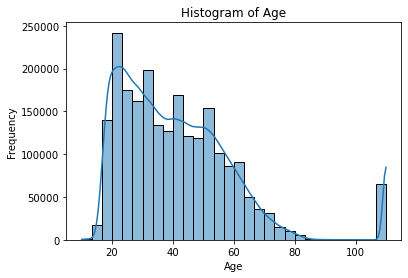

In [124]:
sns.histplot(df['subject_age'], bins=30, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

  # We can se the age is skewed towards one side hence it is valid to replace the missing age by Median of the group

In [125]:
df['subject_age'].fillna(df['subject_age'].median(), inplace=True)
df['subject_age'].isnull().sum()

0

# As per previous hist plot we can see the age column still has some outliers which maybe invalid data from literature review we find out that minimum age of driving in colorado is 15 

C:\Users\Makarand Thorat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


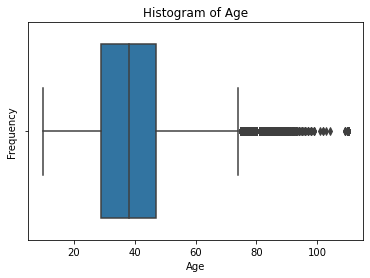

In [126]:
sns.boxplot(df['subject_age'])
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [127]:
df = df[df['subject_age'] >= 15]
df

,date,subject_age,subject_race,subject_sex,search_conducted
0,2013-06-19,26.0,hispanic,male,False
1,2012-08-24,38.0,NaN,NaN,False
2,2012-09-23,52.0,white,male,False
3,2011-08-25,32.0,white,female,False
4,2013-06-08,33.0,hispanic,male,False
...,...,...,...,...,...
3112841,2017-12-31,38.0,asian/pacific islander,NaN,False
3112843,2017-12-31,38.0,white,NaN,False
3112846,2017-12-31,38.0,white,NaN,False
3112851,2017-12-31,38.0,asian/pacific islander,NaN,False


# We will be doing analysis of white, black and Hispanic Race hence will delete the other values from subject_race column

In [128]:
allowed_races = ['hispanic', 'black', 'white']
df = df[df['subject_race'].isin(allowed_races)]
df['subject_race'].isnull().sum()

0

In [129]:
#deleteing rows where search value is missing
df.dropna(subset=['search_conducted'],inplace=True)
df.dropna(subset=['date'],inplace=True)
df.shape

<ipython-input-129-b0934dc6306f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['search_conducted'],inplace=True)
<ipython-input-129-b0934dc6306f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['date'],inplace=True)


(2317796, 5)

# Data Processing : We first convert all the date column to just keep the year 

In [133]:
df['year'] = pd.to_datetime(df['date'])
df['date'].dtype

<ipython-input-133-0820d30e23c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.to_datetime(df['date'])


dtype('O')

In [132]:
df['year']

0         2013-06-19
2         2012-09-23
3         2011-08-25
4         2013-06-08
6         2012-04-07
             ...    
3112837   2017-12-31
3112840   2017-12-31
3112843   2017-12-31
3112846   2017-12-31
3112852   2017-12-31
Name: year, Length: 2317796, dtype: datetime64[ns]

In [18]:
df['year'].unique()

array([2013, 2012, 2011, 2010, 2014, 2015, 2016, 2017], dtype=int64)

In [9]:
import numpy as np

# Creating 3 divisions for ages 

In [23]:
df['age_group'] = np.select(
    [
        (df['subject_age'] >= 60),
        (df['subject_age'] < 60) & (df['subject_age'] >= 30),
        (df['subject_age'] < 30)
    ],
    ['Senior', 'Adult', 'Young'],

)

# Display the DataFrame with the new 'age_group' column
print(df)

              date  subject_age subject_race subject_sex search_conducted  \
0       2013-06-19         26.0     hispanic        male            False   
2       2012-09-23         52.0        white        male            False   
3       2011-08-25         32.0        white      female            False   
4       2013-06-08         33.0     hispanic        male            False   
6       2012-04-07         39.0        white        male            False   
...            ...          ...          ...         ...              ...   
3112837 2017-12-31         38.0        white         NaN            False   
3112840 2017-12-31         38.0        white         NaN            False   
3112843 2017-12-31         38.0        white         NaN            False   
3112846 2017-12-31         38.0        white         NaN            False   
3112852 2017-12-31         38.0        white         NaN            False   

         year age_group  
0        2013     Young  
2        2012     Adult

<ipython-input-23-b779632d82c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = np.select(


In [32]:
df = df.sort_values(by='subject_race')

In [35]:
df['subject_race'].value_counts()

white       1904098
hispanic     335769
black         77929
Name: subject_race, dtype: int64

In [76]:
df = df.sort_values(by='year')

In [117]:
df.to_csv("clean_colorado")

# Seprating the Black white and Hispanic data into 3 separate Datafarames

In [ ]:
df_white = df[df['subject_race'] == 'white'].copy()
df_hispanic = df[df['subject_race'] == 'hispanic'].copy()
df_black = df[df['subject_race'] == 'black'].copy()

In [ ]:
# Calculating the Value of search rate per 100 stops and storing them in list

a=[]
ayear=[]
count=0
arace = []
newcount=0
for i in range(0,len(df_black)):
    newcount = newcount+1
    if(df_black.iloc[i]['search_conducted']==True):
        count = count+1
    if(newcount == 500):
        a.append(count/5)
        arace.append("black")
        ayear.append(df_black.iloc[i]['year'])
        count=0
        newcount=0
    if( i == len(df_black)-1):
        a.append((count/newcount)*100)
        arace.append("black")
        ayear.append(df_black.iloc[i]['year'])


b=[]
byear=[]
count=0
brace = []
newcount=0
for i in range(0,len(df_hispanic)):
    newcount = newcount+1
    if(df_hispanic.iloc[i]['search_conducted']==True):
        count = count+1
    if(newcount == 500):
        b.append(count/5)
        brace.append("hispanic")
        byear.append(df_hispanic.iloc[i]['year'])
        count=0
        newcount=0
    if( i == len(df_hispanic)-1):
        b.append((count/newcount)*100)
        brace.append("hispanic")
        byear.append(df_hispanic.iloc[i]['year'])

c=[]
cyear=[]
count=0
crace = []
newcount=0
for i in range(0,len(df_white)):
    newcount = newcount+1
    if(df_white.iloc[i]['search_conducted']==True):
        count = count+1
    if(newcount == 500):
        c.append(count/5)
        crace.append("white")
        cyear.append(df_white.iloc[i]['year'])
        count=0
        newcount=0
    if( i == len(df_white)-1):
        c.append((count/newcount)*100)
        crace.append("white")
        cyear.append(df_white.iloc[i]['year'])

In [ ]:
#appending the lists in a combined list a , b ,c represents black hispanic and white and adding to a df_new csv file
driver_race = arace + brace + crace
year = ayear + byear + cyear
search_rate = a + b + c

df_new = pd.DataFrame({
    'driver_race': driver_race,
    'year': year,
    'search_rate': search_rate
})

df_new.to_csv("df_new.csv")